In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Train MSE:", mean_squared_error(y_train, lr.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, lr.predict(X_test)))


Train MSE: 0.5179331255246699
Test MSE: 0.5558915986952444


In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("Ridge Test MSE:", mean_squared_error(y_test, ridge.predict(X_test)))
print("Lasso Test MSE:", mean_squared_error(y_test, lasso.predict(X_test)))


Ridge Test MSE: 0.5558034669932211
Lasso Test MSE: 0.6135115198058131


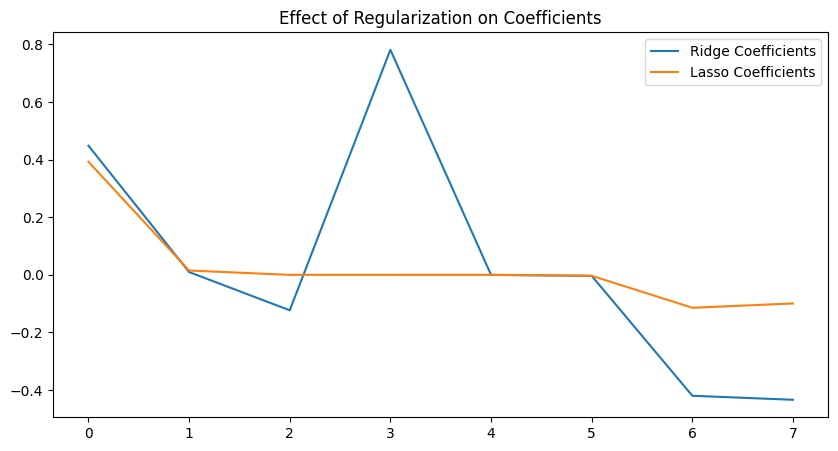

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ridge.coef_, label='Ridge Coefficients')
plt.plot(lasso.coef_, label='Lasso Coefficients')
plt.legend()
plt.title("Effect of Regularization on Coefficients")
plt.show()
